In [42]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd
import Nucleaseq_data_processing as processing
reload(processing);
import sys
sys.path.append('../code_general_Finkelsteinlab/')
import Process_SeqLibrary_Finkelsteinlab as process
reload(process)
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()

path = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

In [2]:
position = 6

print 'PAM: G  G  U'
print '     C  C  A'
print ''

data = pd.read_csv(path+filename)
print 'Target E'
print '----------------------------------------------------------'
print '1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20'
guideseq = 'C  G  C  A  G  A  G  U  A  G  A  A  A  U  A  C  G  C  A  G'
print 'On-target guide:'
print guideseq
print 'Target:'
print 'G  C  G  T  C  T  C  A  T  C  T  T  T  A  T  G  C  G  T  C'
print '----------------------------------------------------------'
print ''
print ''

print 'Target D'
print '----------------------------------------------------------'
print '1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20'
guideseq = 'G  U  A  C  C  G  U  A  A  G  G  U  G  A  A  U  A  G  U  G'
print 'On-target guide:'
print guideseq
print 'Target:'
print 'C  A  T  G  G  C  A  T  T  C  C  A  C  T  T  A  T  C  A  C'
print '----------------------------------------------------------'

data.columns = [c.replace(' ', '_') for c in data.columns]
mismatch = data[data.Mutation_Positions == str(position)]
sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])

sequences = np.array(sequences)
rates = np.array(mismatch.cleavage_rate)

PAM: G  G  U
     C  C  A

Target E
----------------------------------------------------------
1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
On-target guide:
C  G  C  A  G  A  G  U  A  G  A  A  A  U  A  C  G  C  A  G
Target:
G  C  G  T  C  T  C  A  T  C  T  T  T  A  T  G  C  G  T  C
----------------------------------------------------------


Target D
----------------------------------------------------------
1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
On-target guide:
G  U  A  C  C  G  U  A  A  G  G  U  G  A  A  U  A  G  U  G
Target:
C  A  T  G  G  C  A  T  T  C  C  A  C  T  T  A  T  C  A  C
----------------------------------------------------------


## Mismatch types cleavage double

TT: 0.000406724387985, length: 1
TG: 0.00034577026655100004, length: 1
TA: 0.00033672601873299993, length: 1
CT: 0.00010945825505700001, length: 1
CG: 0.000137083998557, length: 1
CA: 0.000122170684355, length: 1
GT: 0.0129052763189, length: 1
GG: 0.012530872931200001, length: 1
GA: 0.009612581065110001, length: 1


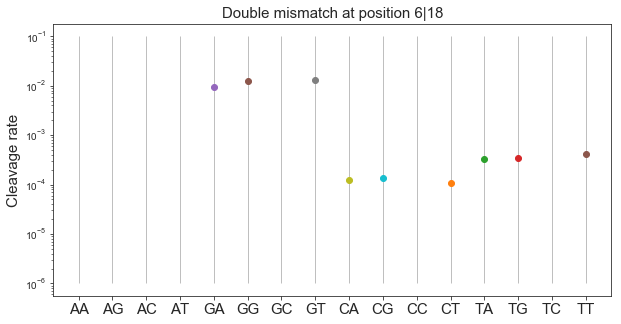

In [57]:
data = pd.read_csv(path+filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

position1 = 6
position2 = 18

mismatch2 = data[data.Mutation_Positions == str(position1)+'|'+str(position2)]
sequences2 = mismatch2['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
sequences2 = np.array(sequences2)
rates2 = np.array(mismatch2.cleavage_rate)

AA = list()
AG = list()
AC = list()
AT = list()
GA = list()
GG = list()
GC = list()
GT = list()
CA = list()
CG = list()
CC = list()
CT = list()
TA = list()
TG = list()
TC = list()
TT = list()

for i in range(len(rates2)):
    if sequences2[i][position1-1] == 'T':
        if sequences2[i][position2-1] == 'T':
            TT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            TC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            TG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            TA.append(rates2[i])
    elif sequences2[i][position1-1] == 'C':
        if sequences2[i][position2-1] == 'T':
            CT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            CC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            CG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            CA.append(rates2[i])
    elif sequences2[i][position1-1] == 'G':
        if sequences2[i][position2-1] == 'T':
            GT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            GC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            GG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            GA.append(rates2[i])
    elif sequences2[i][position1-1] == 'A':
        if sequences2[i][position2-1] == 'T':
            AT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            AC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            AG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            AA.append(rates2[i])
    else:
        print 'dubbelhuh'
        
if len(TT)!=0:        
    print 'TT: ' + str(np.mean(TT)) + ', length: ' + str(len(TT))
if len(TC)!=0:        
    print 'TC: ' + str(np.mean(TC)) + ', length: ' + str(len(TC))
if len(TG)!=0:        
    print 'TG: ' + str(np.mean(TG)) + ', length: ' + str(len(TG))
if len(TA)!=0:        
    print 'TA: ' + str(np.mean(TA)) + ', length: ' + str(len(TA))
if len(CT)!=0:        
    print 'CT: ' + str(np.mean(CT)) + ', length: ' + str(len(CT))
if len(CC)!=0:        
    print 'CC: ' + str(np.mean(CC)) + ', length: ' + str(len(CC))
if len(CG)!=0:        
    print 'CG: ' + str(np.mean(CG)) + ', length: ' + str(len(CG))
if len(CA)!=0:        
    print 'CA: ' + str(np.mean(CA)) + ', length: ' + str(len(CA))
if len(GT)!=0:        
    print 'GT: ' + str(np.mean(GT)) + ', length: ' + str(len(GT))
if len(GC)!=0:        
    print 'GC: ' + str(np.mean(GC)) + ', length: ' + str(len(GC))
if len(GG)!=0:        
    print 'GG: ' + str(np.mean(GG)) + ', length: ' + str(len(GG))
if len(GA)!=0:        
    print 'GA: ' + str(np.mean(GA)) + ', length: ' + str(len(GA))
if len(AT)!=0:        
    print 'AT: ' + str(np.mean(AT)) + ', length: ' + str(len(AT))
if len(AC)!=0:        
    print 'AC: ' + str(np.mean(AC)) + ', length: ' + str(len(AC))
if len(AG)!=0:        
    print 'AG: ' + str(np.mean(AG)) + ', length: ' + str(len(AG))
if len(AA)!=0:        
    print 'AA: ' + str(np.mean(AA)) + ', length: ' + str(len(AA))
    
plt.figure(figsize=[10,5])
plt.semilogy(np.ones(len(AA)),AA,marker='o')
plt.semilogy(np.ones(len(AG))*2,AG,marker='o')
plt.semilogy(np.ones(len(AC))*3,AC,marker='o')
plt.semilogy(np.ones(len(AT))*4,AT,marker='o')
plt.semilogy(np.ones(len(GA))*5,GA,marker='o')
plt.semilogy(np.ones(len(GG))*6,GG,marker='o')
plt.semilogy(np.ones(len(GC))*7,GC,marker='o')
plt.semilogy(np.ones(len(GT))*8,GT,marker='o')
plt.semilogy(np.ones(len(CA))*9,CA,marker='o')
plt.semilogy(np.ones(len(CG))*10,CG,marker='o')
plt.semilogy(np.ones(len(CC))*11,CC,marker='o')
plt.semilogy(np.ones(len(CT))*12,CT,marker='o')
plt.semilogy(np.ones(len(TA))*13,TA,marker='o')
plt.semilogy(np.ones(len(TG))*14,TG,marker='o')
plt.semilogy(np.ones(len(TC))*15,TC,marker='o')
plt.semilogy(np.ones(len(TT))*16,TT,marker='o')

#plt.semilogy(1,np.median(AA),marker='x',markersize=20)
#plt.semilogy(2,np.median(AG),marker='x',markersize=20)
#plt.semilogy(3,np.median(AC),marker='x',markersize=20)
#plt.semilogy(4,np.median(AT),marker='x',markersize=20)

plt.title('Cleavage rate: Double mismatch at position ' + str(position1) + '|' + str(position2),fontsize=15)
plt.xticks(range(1,17),['AA','AG','AC','AT','GA','GG','GC','GT','CA','CG','CC','CT','TA','TG','TC','TT'],fontsize=15)
plt.ylabel('Cleavage rate',fontsize=15)
plt.vlines(range(1,17),10**-6,10**-1,linewidth=0.5,color='grey')

## Mismatch types on-rate double

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


GT: 8.679635e-05, length: 1
GG: 8.890575e-05, length: 1
GA: 0.000113461, length: 1


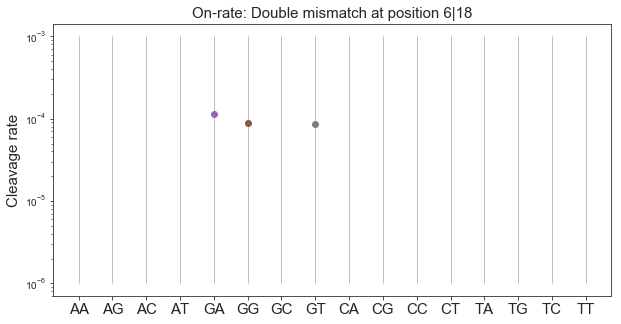

In [62]:
data = pd.read_csv('../Data_Boyle/' + 'second_fit_data.summarized.on.1nM.rep1'  + '.txt', delimiter='\t')
data = data[data['nmut'] < 3][['mutations', 'slope', 'se','seq']]
data['PAM'] = data['seq'].apply(lambda s: separate_PAM(s)[2])
data['seq'] = data['seq'].apply(lambda s: separate_PAM(s)[1])
data = data[data['PAM']]
data['Mutation_Positions'] = data['mutations'].apply(boy.get_pos)
data['number'] = data['Mutation_Positions'].apply(len)

position1 = 6
position2 = 18
position = str(position2)+'|'+str(position1)
mismatch = data[data['number']==2]
mismatch['Mutation_Positions'] = mismatch['Mutation_Positions'].apply(lambda x: str(x[0])+'|'+str(x[1]))
mismatch2 = mismatch[mismatch['Mutation_Positions']==position]
sequences2 = mismatch2['seq']
sequences2 = np.array(sequences2)
rates2 = np.array(mismatch2.slope)
numbers[i-1,j-1] = len(mismatch2)

AA = list()
AG = list()
AC = list()
AT = list()
GA = list()
GG = list()
GC = list()
GT = list()
CA = list()
CG = list()
CC = list()
CT = list()
TA = list()
TG = list()
TC = list()
TT = list()

for i in range(len(rates2)):
    if sequences2[i][position1-1] == 'T':
        if sequences2[i][position2-1] == 'T':
            TT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            TC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            TG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            TA.append(rates2[i])
    elif sequences2[i][position1-1] == 'C':
        if sequences2[i][position2-1] == 'T':
            CT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            CC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            CG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            CA.append(rates2[i])
    elif sequences2[i][position1-1] == 'G':
        if sequences2[i][position2-1] == 'T':
            GT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            GC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            GG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            GA.append(rates2[i])
    elif sequences2[i][position1-1] == 'A':
        if sequences2[i][position2-1] == 'T':
            AT.append(rates2[i])
        elif sequences2[i][position2-1] == 'C':
            AC.append(rates2[i])
        elif sequences2[i][position2-1] == 'G':
            AG.append(rates2[i])
        elif sequences2[i][position2-1] == 'A':
            AA.append(rates2[i])
    else:
        print 'dubbelhuh'
        
if len(TT)!=0:        
    print 'TT: ' + str(np.mean(TT)) + ', length: ' + str(len(TT))
if len(TC)!=0:        
    print 'TC: ' + str(np.mean(TC)) + ', length: ' + str(len(TC))
if len(TG)!=0:        
    print 'TG: ' + str(np.mean(TG)) + ', length: ' + str(len(TG))
if len(TA)!=0:        
    print 'TA: ' + str(np.mean(TA)) + ', length: ' + str(len(TA))
if len(CT)!=0:        
    print 'CT: ' + str(np.mean(CT)) + ', length: ' + str(len(CT))
if len(CC)!=0:        
    print 'CC: ' + str(np.mean(CC)) + ', length: ' + str(len(CC))
if len(CG)!=0:        
    print 'CG: ' + str(np.mean(CG)) + ', length: ' + str(len(CG))
if len(CA)!=0:        
    print 'CA: ' + str(np.mean(CA)) + ', length: ' + str(len(CA))
if len(GT)!=0:        
    print 'GT: ' + str(np.mean(GT)) + ', length: ' + str(len(GT))
if len(GC)!=0:        
    print 'GC: ' + str(np.mean(GC)) + ', length: ' + str(len(GC))
if len(GG)!=0:        
    print 'GG: ' + str(np.mean(GG)) + ', length: ' + str(len(GG))
if len(GA)!=0:        
    print 'GA: ' + str(np.mean(GA)) + ', length: ' + str(len(GA))
if len(AT)!=0:        
    print 'AT: ' + str(np.mean(AT)) + ', length: ' + str(len(AT))
if len(AC)!=0:        
    print 'AC: ' + str(np.mean(AC)) + ', length: ' + str(len(AC))
if len(AG)!=0:        
    print 'AG: ' + str(np.mean(AG)) + ', length: ' + str(len(AG))
if len(AA)!=0:        
    print 'AA: ' + str(np.mean(AA)) + ', length: ' + str(len(AA))
    
plt.figure(figsize=[10,5])
plt.semilogy(np.ones(len(AA)),AA,marker='o')
plt.semilogy(np.ones(len(AG))*2,AG,marker='o')
plt.semilogy(np.ones(len(AC))*3,AC,marker='o')
plt.semilogy(np.ones(len(AT))*4,AT,marker='o')
plt.semilogy(np.ones(len(GA))*5,GA,marker='o')
plt.semilogy(np.ones(len(GG))*6,GG,marker='o')
plt.semilogy(np.ones(len(GC))*7,GC,marker='o')
plt.semilogy(np.ones(len(GT))*8,GT,marker='o')
plt.semilogy(np.ones(len(CA))*9,CA,marker='o')
plt.semilogy(np.ones(len(CG))*10,CG,marker='o')
plt.semilogy(np.ones(len(CC))*11,CC,marker='o')
plt.semilogy(np.ones(len(CT))*12,CT,marker='o')
plt.semilogy(np.ones(len(TA))*13,TA,marker='o')
plt.semilogy(np.ones(len(TG))*14,TG,marker='o')
plt.semilogy(np.ones(len(TC))*15,TC,marker='o')
plt.semilogy(np.ones(len(TT))*16,TT,marker='o')

#plt.semilogy(1,np.median(AA),marker='x',markersize=20)
#plt.semilogy(2,np.median(AG),marker='x',markersize=20)
#plt.semilogy(3,np.median(AC),marker='x',markersize=20)
#plt.semilogy(4,np.median(AT),marker='x',markersize=20)

plt.title('On-rate: Double mismatch at position ' + str(position1) + '|' + str(position2),fontsize=15)
plt.xticks(range(1,17),['AA','AG','AC','AT','GA','GG','GC','GT','CA','CG','CC','CT','TA','TG','TC','TT'],fontsize=15)
plt.ylabel('Cleavage rate',fontsize=15)
plt.vlines(range(1,17),10**-6,10**-3,linewidth=0.5,color='grey')

## Measurement numbers on-rate double

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


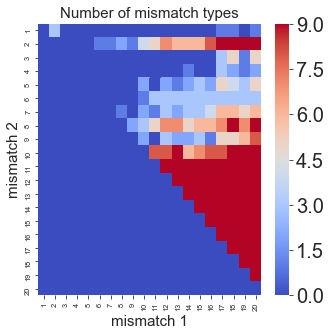

In [64]:
import sys
sys.path.append('../code_Boyle/')
sys.path.append('../code_general_Finkelsteinlab/')
import Boyle_data_processing as boy
import Process_SeqLibrary_Finkelsteinlab as fin
import Nucleaseq_data_processing as nuc
reload(fin)
reload(boy)
reload(nuc)

data = pd.read_csv('../Data_Boyle/' + 'second_fit_data.summarized.on.1nM.rep1'  + '.txt', delimiter='\t')
data = data[data['nmut'] < 3][['mutations', 'slope', 'se','seq']]
data['PAM'] = data['seq'].apply(lambda s: separate_PAM(s)[2])
data['seq'] = data['seq'].apply(lambda s: separate_PAM(s)[1])
data = data[data['PAM']]
data['Mutation_Positions'] = data['mutations'].apply(boy.get_pos)
data['number'] = data['Mutation_Positions'].apply(len)
guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'

numbers = np.zeros([20,20])

for i in range(1,20):
    for j in range(i+1,21):
        position1 = i
        position2 = j
        position = str(position2)+'|'+str(position1)
        mismatch = data[data['number']==2]
        mismatch['Mutation_Positions'] = mismatch['Mutation_Positions'].apply(lambda x: str(x[0])+'|'+str(x[1]))
        mismatch2 = mismatch[mismatch['Mutation_Positions']==position]
        sequences2 = mismatch2['seq']
        sequences2 = np.array(sequences2)
        rates2 = np.array(mismatch2.slope)
        numbers[i-1,j-1] = len(mismatch2)
        
numbers = pd.DataFrame(numbers, index=range(1,21), columns=range(1,21))

plt.figure(figsize=[5,5])
ax = sns.heatmap(numbers,cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('Number of mismatch types', fontsize=15)
plt.xticks(np.arange(0.5,20.5),range(1,21),fontsize=7.5)
plt.yticks(np.arange(0.5,20.5),range(1,21),fontsize=7.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

In [29]:
def separate_PAM(S, Cas='Cas9'):
    if Cas == 'Cas9':
        PAM_len = 3
        PAM = S[-PAM_len:]
        s = S[0:-PAM_len]
        s = s[::-1]
        #s = s[0:-1]
        canonical = False
        if PAM[1:] == 'GG':
            canonical = True
    if Cas == 'Cas12a':
        PAM_len = 4
        PAM = S[:PAM_len]
        s = S[PAM_len:]
        s = s[0:-3]
        canonical = False
        if (PAM[:3] == 'TTT') & (PAM[3] != 'T'):
            canonical = True
    return PAM, s, canonical

In [44]:
A = list()
G = list()
C = list()
T = list()

for i in range(len(rates)):
    if sequences[i][position-1] == 'T':
        T.append(rates[i])
    elif sequences[i][position-1] == 'A':
        A.append(rates[i])
    elif sequences[i][position-1] == 'G':
        G.append(rates[i])
    elif sequences[i][position-1] == 'C':
        C.append(rates[i])
    else:
        print 'dubbelhuh'
        
if len(T)!=0:        
    print 'T: ' + str(np.mean(T)) + ', length: ' + str(len(T))       
if len(A)!=0:
    print 'A: ' + str(np.mean(A)) + ', length: ' + str(len(A))  
if len(G)!=0:
    print 'G: ' + str(np.mean(G)) + ', length: ' + str(len(G))  
if len(C)!=0:
    print 'C: ' + str(np.mean(C)) + ', length: ' + str(len(C))

TypeError: unsupported operand type(s) for -: 'str' and 'int'

C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0,0.5,'Cleavage rate')

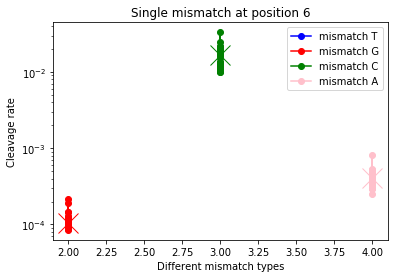

In [5]:
plt.semilogy(np.ones(len(A)),A,color='blue',marker='o')
plt.semilogy(np.ones(len(C))*2,C,color='red',marker='o')
plt.semilogy(np.ones(len(G))*3,G,color='green',marker='o')
plt.semilogy(np.ones(len(T))*4,T,color='pink',marker='o')
plt.semilogy(1,np.median(A),color='blue',marker='x',markersize=20)
plt.semilogy(2,np.median(C),color='red',marker='x',markersize=20)
plt.semilogy(3,np.median(G),color='green',marker='x',markersize=20)
plt.semilogy(4,np.median(T),color='pink',marker='x',markersize=20)
plt.legend(['mismatch T','mismatch G', 'mismatch C', 'mismatch A'])
plt.title('Single mismatch at position ' + str(position))
plt.xlabel('Different mismatch types')
plt.ylabel('Cleavage rate')

[0, 21, 1e-06, 1]

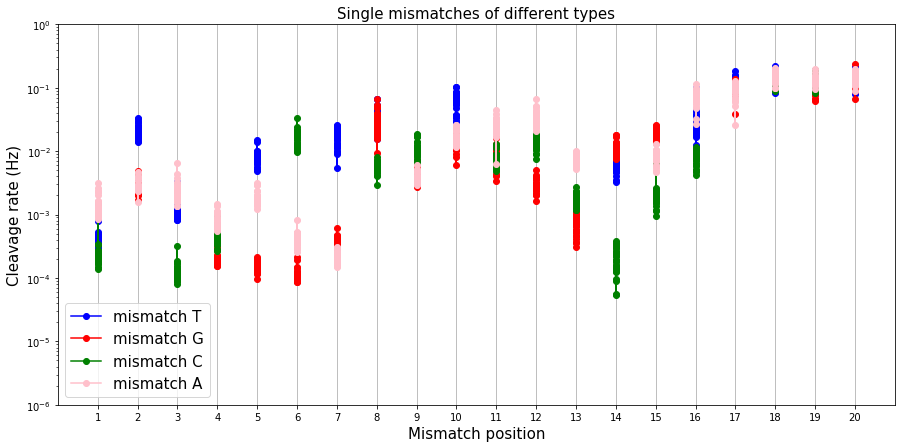

In [4]:
guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
plt.figure(figsize=[15,7])
for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plt.semilogy(np.ones(len(A))*position,A,color='blue',marker='o')
    plt.semilogy(np.ones(len(C))*position,C,color='red',marker='o')
    plt.semilogy(np.ones(len(G))*position,G,color='green',marker='o')
    plt.semilogy(np.ones(len(T))*position,T,color='pink',marker='o')

plt.vlines(range(1,21),10**-6,1,color='grey',linewidth=0.5)
plt.legend(['mismatch T','mismatch G', 'mismatch C', 'mismatch A'], fontsize=15)
plt.title('Single mismatches of different types', fontsize=15)
plt.xlabel('Mismatch position', fontsize=15)
plt.ylabel('Cleavage rate (Hz)', fontsize=15)
plt.xticks(range(1,21))
plt.axis([0, 21, 10**-6, 1])

Text(0,0.5,'Cleavage rate')

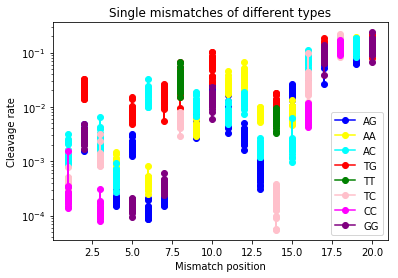

In [27]:
guide_sequence = 'CGCAGAGTAGAAATACGCAG'
for j in range(1,21):
    right = guide_sequence[j-1]
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    
    AG = list()
    AA = list()
    AC = list()
    TG = list()
    TT = list()
    TC = list()
    CC = list()
    GG = list()

    for i in range(len(rates)):
        if right == 'A':
            if sequences[i][position-1] == 'A':
                print 'huhA' + str(j)
            elif sequences[i][position-1] == 'T':
                AA.append(rates[i])
            elif sequences[i][position-1] == 'C':
                AG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                AC.append(rates[i])
            else:
                print 'dubbelhuhA' + str(j)
                
        if right == 'T':
            if sequences[i][position-1] == 'T':
                print 'huhT' + str(j)
            elif sequences[i][position-1] == 'A':
                TT.append(rates[i])
            elif sequences[i][position-1] == 'C':
                TG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                TC.append(rates[i])
            else:
                print 'dubbelhuhT' + str(j)
                
        if right == 'C':
            if sequences[i][position-1] == 'C':
                print 'huhC' + str(j)
            elif sequences[i][position-1] == 'T':
                AC.append(rates[i])
            elif sequences[i][position-1] == 'A':
                TC.append(rates[i])
            elif sequences[i][position-1] == 'G':
                CC.append(rates[i])
            else:
                print 'dubbelhuhC' + str(j)
                
        if right == 'G':
            if sequences[i][position-1] == 'G':
                print 'huhG'+ str(j) 
            elif sequences[i][position-1] == 'T':
                AG.append(rates[i])
            elif sequences[i][position-1] == 'C':
                GG.append(rates[i])
            elif sequences[i][position-1] == 'A':
                TG.append(rates[i])
            else:
                print 'dubbelhuhG' + str(j)
                
    

    plt.semilogy(np.ones(len(AG))*position,AG,color='blue',marker='o')
    plt.semilogy(np.ones(len(AA))*position,AA,color='yellow',marker='o')
    plt.semilogy(np.ones(len(AC))*position,AC,color='cyan',marker='o')
    plt.semilogy(np.ones(len(TG))*position,TG,color='red',marker='o')
    plt.semilogy(np.ones(len(TT))*position,TT,color='green',marker='o')
    plt.semilogy(np.ones(len(TC))*position,TC,color='pink',marker='o')
    plt.semilogy(np.ones(len(CC))*position,CC,color='magenta',marker='o')
    plt.semilogy(np.ones(len(GG))*position,GG,color='purple',marker='o')
    
plt.legend(['AG','AA','AC','TG','TT','TC','CC','GG'])
plt.title('Single mismatches of different types')
plt.xlabel('Mismatch position')
plt.ylabel('Cleavage rate')

Text(0,0.5,'Cleavage rate')

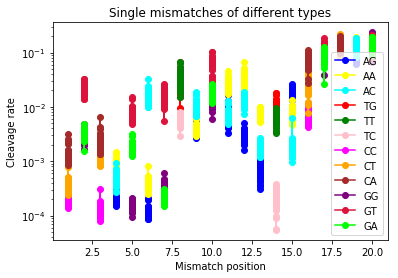

In [28]:
guide_sequence = 'CGCAGAGTAGAAATACGCAG'
for j in range(1,21):
    right = guide_sequence[j-1]
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    
    AG = list()
    AA = list()
    AC = list()
    TG = list()
    TT = list()
    TC = list()
    CC = list()
    CA = list()
    CT = list()
    GT = list()
    GG = list()
    GA = list()

    for i in range(len(rates)):
        if right == 'A':
            if sequences[i][position-1] == 'A':
                print 'huhA' + str(j)
            elif sequences[i][position-1] == 'T':
                AA.append(rates[i])
            elif sequences[i][position-1] == 'C':
                AG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                AC.append(rates[i])
            else:
                print 'dubbelhuhA' + str(j)
                
        if right == 'T':
            if sequences[i][position-1] == 'T':
                print 'huhT' + str(j)
            elif sequences[i][position-1] == 'A':
                TT.append(rates[i])
            elif sequences[i][position-1] == 'C':
                TG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                TC.append(rates[i])
            else:
                print 'dubbelhuhT' + str(j)
                
        if right == 'C':
            if sequences[i][position-1] == 'C':
                print 'huhC' + str(j)
            elif sequences[i][position-1] == 'T':
                CA.append(rates[i])
            elif sequences[i][position-1] == 'A':
                CT.append(rates[i])
            elif sequences[i][position-1] == 'G':
                CC.append(rates[i])
            else:
                print 'dubbelhuhC' + str(j)
                
        if right == 'G':
            if sequences[i][position-1] == 'G':
                print 'huhG'+ str(j) 
            elif sequences[i][position-1] == 'T':
                GA.append(rates[i])
            elif sequences[i][position-1] == 'C':
                GG.append(rates[i])
            elif sequences[i][position-1] == 'A':
                GT.append(rates[i])
            else:
                print 'dubbelhuhG' + str(j)
                
    

    plt.semilogy(np.ones(len(AG))*position,AG,color='blue',marker='o')
    plt.semilogy(np.ones(len(AA))*position,AA,color='yellow',marker='o')
    plt.semilogy(np.ones(len(AC))*position,AC,color='cyan',marker='o')
    plt.semilogy(np.ones(len(TG))*position,TG,color='red',marker='o')
    plt.semilogy(np.ones(len(TT))*position,TT,color='green',marker='o')
    plt.semilogy(np.ones(len(TC))*position,TC,color='pink',marker='o')
    plt.semilogy(np.ones(len(CC))*position,CC,color='magenta',marker='o')
    plt.semilogy(np.ones(len(CT))*position,CT,color='orange',marker='o')
    plt.semilogy(np.ones(len(CA))*position,CA,color='brown',marker='o')
    plt.semilogy(np.ones(len(GG))*position,GG,color='purple',marker='o')
    plt.semilogy(np.ones(len(GT))*position,GT,color='crimson',marker='o')
    plt.semilogy(np.ones(len(GA))*position,GA,color='lime',marker='o')
    
plt.legend(['AG','AA','AC','TG','TT','TC','CC','CT','CA','GG','GT','GA'])
plt.title('Single mismatches of different types')
plt.xlabel('Mismatch position')
plt.ylabel('Cleavage rate')